In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# % matplotlib inline

from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)

In [3]:
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 81), (438, 81))

In [5]:
X_train.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [6]:
def to_numeric(df_train,df_test,col):
    lab_dict = {k: i for i,k in enumerate (df_train[col].unique())}
    print(lab_dict)
    df_train[col] = df_train[col].map(lab_dict)
    df_test[col] = df_test[col].map(lab_dict)
    


In [7]:
# to_numeric(X_train,X_test,'MasVnrType')

In [8]:
X_train.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [9]:
len(X_train.MasVnrType.unique())

5

In [10]:
len(X_train)

1022

In [11]:
X_train.shape

(1022, 81)

In [12]:
X_train['MasVnrType'].value_counts()

None       609
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

In [13]:
X_train.groupby(['MasVnrType'])['MasVnrType'].count()


MasVnrType
BrkCmn      10
BrkFace    301
None       609
Stone       97
Name: MasVnrType, dtype: int64

#### Variables with high cardinality

In [14]:
def high_cardinality(df):
    high_card_col =[]
    for col in df:
        if df[col].dtype =='object':
            if len(df[col].unique()) > 10: # col has more then 10 categories
                high_card_col.append(col)
#                 print(df.groupby([col])[col].count()/np.float(df.shape[0]))
                print()
                print(df[col].value_counts()/np.float(df.shape[0]))
                print()
    return high_card_col 
                
            

In [44]:
high_card_col = high_cardinality(X_train)


NAmes      0.147750
CollgCr    0.102740
OldTown    0.071429
Edwards    0.069472
Sawyer     0.059687
Somerst    0.054795
Gilbert    0.053816
NWAmes     0.049902
NridgHt    0.049902
SawyerW    0.044031
BrkSide    0.040117
Mitchel    0.035225
Crawfor    0.034247
Timber     0.029354
NoRidge    0.029354
IDOTRR     0.023483
ClearCr    0.023483
SWISU      0.017613
StoneBr    0.015656
Blmngtn    0.011742
MeadowV    0.011742
BrDale     0.009785
NPkVill    0.006849
Veenker    0.005871
Blueste    0.001957
Name: Neighborhood, dtype: float64


VinylSd    0.356164
HdBoard    0.149706
Wd Sdng    0.144814
MetalSd    0.135029
Plywood    0.084149
CemntBd    0.038160
BrkFace    0.034247
WdShing    0.020548
Stucco     0.016634
AsbShng    0.014677
Stone      0.001957
BrkComm    0.000978
AsphShn    0.000978
CBlock     0.000978
ImStucc    0.000978
Name: Exterior1st, dtype: float64


VinylSd    0.345401
Wd Sdng    0.138943
HdBoard    0.137965
MetalSd    0.133072
Plywood    0.109589
CmentBd    0.038160
Wd Shn

In [45]:
high_card_col

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [16]:
X_train.Exterior2nd.value_counts()

VinylSd    353
Wd Sdng    142
HdBoard    141
MetalSd    136
Plywood    112
CmentBd     39
Wd Shng     29
BrkFace     18
AsbShng     17
Stucco      16
ImStucc      8
Brk Cmn      4
Stone        4
Other        1
AsphShn      1
CBlock       1
Name: Exterior2nd, dtype: int64

In [17]:
# X_train.groupby('Exterior2nd')['Exterior2nd'].count().sort_values().tail(1).index.values[0]

In [18]:
# X_train['Exterior2nd'].value_counts().index[0]

In [19]:
# X_train.groupby(['Exterior2nd'])['Exterior2nd'].count()/np.float(len(X_train)) <0.5

In [20]:
# temp = X_train.groupby(['Exterior2nd'])['Exterior2nd'].count()/np.float(len(X_train))
# print(temp)
# rare_cat = [x for x in temp.loc[temp<0.05].index.values]

In [21]:
# rare_cat

In [22]:
# temp = X_train['Exterior2nd'].value_counts()/np.float(data.shape[0])

In [23]:
# temp.loc[temp<0.05].index[0:]

In [24]:
# temp = X_train.groupby(['Exterior2nd'])['Exterior2nd'].count()/np.float(len(X_train))
# rare_cat = [x for x in temp.loc[temp<0.05].index.values]

In [25]:
# rare_cat

In [26]:
# c = X_train.copy()

In [27]:
# c['Exterior2nd___']=np.where(c['Exterior2nd'].isin(rare_cat),'yes',c['Exterior2nd'])

In [28]:
# c.groupby(['Exterior2nd'])['Exterior2nd___'].value_counts()

#### There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5% may cause over-fitting in trees.



In [34]:
def rare_imputate(df_train,df_test,col):
    
    # find frequent category
    most_frequent = df_train[col].value_counts().index[0] ## This line of code will output the most frequent one
    
    # find rare label
    
    temp = X_train.groupby([col])[col].count()/np.float(len(X_train))
    rare = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    
    df_train[col +'_freq_imp'] = np.where(df_train[col].isin(rare),most_frequent,df_train[col])
    df_test[col +'_freq_imp']  = np.where(df_test[col].isin(rare),most_frequent,df_test[col])
    
    
    # by RARE
    
    df_train[col + '_rare_imp'] = np.where(df_train[col].isin(rare),'Rare',df_train[col])
    df_test[col + '_rare_imp'] = np.where(df_test[col].isin(rare),'Rare',df_test[col])


In [31]:
# das

In [ ]:
# temp = df_train[col].value_counts()/float(data.shape[0])
# rare = [x for x in temp.loc[temp<0.05].index[0:]]

In [ ]:
# temp = X_train['Neighborhood'].value_counts()/float(data.shape[0])
# rare1 = [x for x in temp.loc[temp<0.05].index.values]

In [ ]:
# print(len(temp))
# print(len(rare1))

In [ ]:
# temp_ =  X_train.groupby('Neighborhood')['Neighborhood'].count().sort_values().tail(1).index.values[0]

In [ ]:
# temp_ = X_train.groupby(['Neighborhood'])['Neighborhood'].count()/np.float(len(X_train))
# # rare_cat = [x for x in temp_.loc[temp_<0.05].index.values]
    

In [ ]:
# temp_

In [ ]:
# for i in temp_.loc[temp_<0.05].index:
#     print(i)

In [ ]:
# for i in temp.loc[temp<0.05].index:
#     print(i)

In [ ]:
# len(temp)


In [ ]:
# len(rare_cat)

In [ ]:
# len(temp_)

In [ ]:
# len(rare)

In [32]:
# q=X_train.copy()
# v =X_test.copy()

In [38]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    rare_imputate(X_train,X_test,col)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [39]:
X_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_freq_imp,Neighborhood_rare_imp,Exterior1st_freq_imp,Exterior1st_rare_imp,Exterior2nd_freq_imp,Exterior2nd_rare_imp
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,2009,WD,Normal,219500,CollgCr,CollgCr,VinylSd,VinylSd,VinylSd,VinylSd
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,...,2008,WD,Normal,173000,NAmes,Rare,Wd Sdng,Wd Sdng,Wd Sdng,Wd Sdng
960,961,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,...,2010,WD,Normal,116500,NAmes,Rare,Wd Sdng,Wd Sdng,Plywood,Plywood
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,2009,WD,Normal,105000,Edwards,Edwards,VinylSd,Rare,VinylSd,Rare
1100,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,2009,WD,Normal,60000,NAmes,Rare,Wd Sdng,Wd Sdng,Wd Sdng,Wd Sdng


In [40]:
X_test.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_freq_imp,Neighborhood_rare_imp,Exterior1st_freq_imp,Exterior1st_rare_imp,Exterior2nd_freq_imp,Exterior2nd_rare_imp
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,2007,WD,Alloca,200624,NAmes,Rare,Wd Sdng,Wd Sdng,VinylSd,Rare
491,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Normal,133000,NAmes,NAmes,Wd Sdng,Wd Sdng,Wd Sdng,Wd Sdng
459,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,...,2009,WD,Normal,110000,NAmes,Rare,MetalSd,MetalSd,MetalSd,MetalSd
279,280,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,192000,NAmes,Rare,Plywood,Plywood,Plywood,Plywood
655,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Family,88000,NAmes,Rare,HdBoard,HdBoard,VinylSd,Rare


Text(0.5, 1.0, 'Neighborhood')

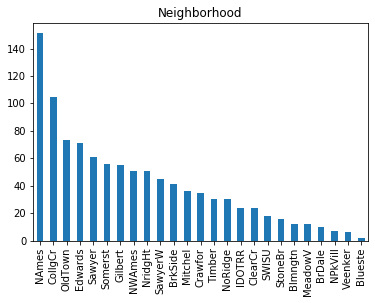

In [41]:
X_train.Neighborhood.value_counts().plot.bar()
plt.title('Neighborhood')

Text(0.5, 1.0, 'Neighborhood')

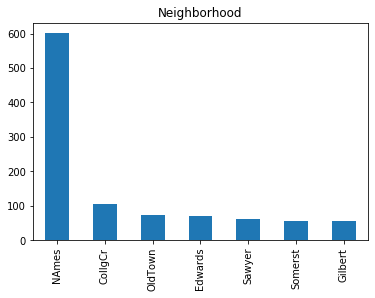

In [42]:
X_train.Neighborhood_freq_imp.value_counts().plot.bar()
plt.title('Neighborhood')

Text(0.5, 1.0, 'Neighborhood')

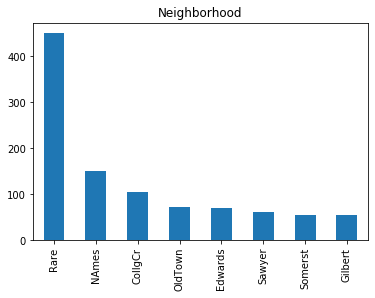

In [43]:
X_train.Neighborhood_rare_imp.value_counts().plot.bar()
plt.title('Neighborhood')

In [47]:
fre_imp =[]
for i in high_card_col:
    fre_imp.append(i +'_freq_imp')

In [48]:
rare_imp =[x+'_rare_imp' for x in high_card_col ]

In [49]:
rare_imp

['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']

In [50]:
fre_imp

['Neighborhood_freq_imp', 'Exterior1st_freq_imp', 'Exterior2nd_freq_imp']

### Let's train RANDOM FOREST

In [53]:
for i in high_card_col:
    to_numeric(X_train,X_test,i)

{'CollgCr': 0, 'ClearCr': 1, 'BrkSide': 2, 'Edwards': 3, 'SWISU': 4, 'Sawyer': 5, 'Crawfor': 6, 'NAmes': 7, 'Mitchel': 8, 'Timber': 9, 'Gilbert': 10, 'Somerst': 11, 'MeadowV': 12, 'OldTown': 13, 'BrDale': 14, 'NWAmes': 15, 'NridgHt': 16, 'SawyerW': 17, 'NoRidge': 18, 'IDOTRR': 19, 'NPkVill': 20, 'StoneBr': 21, 'Blmngtn': 22, 'Veenker': 23, 'Blueste': 24}
{'VinylSd': 0, 'Wd Sdng': 1, 'WdShing': 2, 'HdBoard': 3, 'MetalSd': 4, 'AsphShn': 5, 'BrkFace': 6, 'Plywood': 7, 'CemntBd': 8, 'Stucco': 9, 'BrkComm': 10, 'AsbShng': 11, 'ImStucc': 12, 'CBlock': 13, 'Stone': 14}
{'VinylSd': 0, 'Wd Sdng': 1, 'Plywood': 2, 'Wd Shng': 3, 'HdBoard': 4, 'MetalSd': 5, 'AsphShn': 6, 'CmentBd': 7, 'BrkFace': 8, 'Stucco': 9, 'ImStucc': 10, 'Stone': 11, 'AsbShng': 12, 'Brk Cmn': 13, 'CBlock': 14, 'Other': 15}


/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
for j in rare_imp:
    to_numeric(X_train,X_test,j)

{'CollgCr': 0, 'Rare': 1, 'Edwards': 2, 'Sawyer': 3, 'NAmes': 4, 'Gilbert': 5, 'Somerst': 6, 'OldTown': 7}
{'VinylSd': 0, 'Wd Sdng': 1, 'Rare': 2, 'HdBoard': 3, 'MetalSd': 4, 'Plywood': 5}
{'VinylSd': 0, 'Wd Sdng': 1, 'Plywood': 2, 'Rare': 3, 'HdBoard': 4, 'MetalSd': 5}


/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [58]:
for k in fre_imp:
    to_numeric(X_train,X_test,k)

{'CollgCr': 0, 'NAmes': 1, 'Edwards': 2, 'Sawyer': 3, 'Gilbert': 4, 'Somerst': 5, 'OldTown': 6}
{'VinylSd': 0, 'Wd Sdng': 1, 'HdBoard': 2, 'MetalSd': 3, 'Plywood': 4}
{'VinylSd': 0, 'Wd Sdng': 1, 'Plywood': 2, 'HdBoard': 3, 'MetalSd': 4}


/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
# X_train.Neighborhood

In [72]:
clf = RandomForestRegressor()
# for fit in high_card_col:
clf.fit(X_train[['Neighborhood', 'Exterior1st', 'Exterior2nd']],y_train)

pred_train = clf.predict(X_train[['Neighborhood', 'Exterior1st', 'Exterior2nd']])
pred_test = clf.predict(X_test[['Neighborhood', 'Exterior1st', 'Exterior2nd']])
print('Train set')
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('Test set')
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

Train set
Random Forests mse: 2008688037.2447712
Test set
Random Forests mse: 3177558221.897299


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
clf = RandomForestRegressor()
# for fit in high_card_col:
clf.fit(X_train[['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']],y_train)

pred_train = clf.predict(X_train[['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']])
pred_test = clf.predict(X_test[['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']])
print('Train set')
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('Test set')
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

Train set
Random Forests mse: 4199439332.083284
Test set
Random Forests mse: 5316855186.978768


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
clf = RandomForestRegressor()
# for fit in high_card_col:
clf.fit(X_train[['Neighborhood_freq_imp', 'Exterior1st_freq_imp', 'Exterior2nd_freq_imp']],y_train)

pred_train = clf.predict(X_train[['Neighborhood_freq_imp', 'Exterior1st_freq_imp', 'Exterior2nd_freq_imp']])
pred_test = clf.predict(X_test[['Neighborhood_freq_imp', 'Exterior1st_freq_imp', 'Exterior2nd_freq_imp']])
print('Train set')
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('Test set')
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

Train set
Random Forests mse: 4753250865.510349
Test set
Random Forests mse: 5596540754.928702


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



For the house price predictions, we see that actually, replacing those rare values by re-categorisation does not improve the performance of random forests, on the contrary, it affects it quite dramatically (the mse are higher). This indicates that actually, those rarities, those infrequent labels, have quite a dramatic impact on price.